# Customer Segmentation & Personality Analysis

In [1]:
#load libraries
import pandas as pd
import numpy as np
from datetime import date
import pip
pip.main(['install','seaborn'])
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import random
import warnings
warnings.filterwarnings("ignore")

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable

Requirement already satisfied: seaborn in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (0.12.2)

Requirement already satisfied: numpy!=1.24.0,>=1.17 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from seaborn) (1.24.1)

Requirement already satisfied: pandas>=0.25 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from seaborn) (2.1.1)

Requirement already satisfied: matplotlib!=3.6.1,>=3.1 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from seaborn) (3.8.0)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.0.7)

Requirement already satisfied: cycler>=0.10 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (0.11.0)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (4.38.0)

Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.4.4)

Requirement already satisfied: packaging>=20.0 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (23.0)

Requirement already satisfied: pillow>=6.2.0 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (9.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (3.0.9)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from pandas>=0.25->seaborn) (2022.7.1)

Requirement already satisfied: tzdata>=2022.1 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from pandas>=0.25->seaborn) (2023.3)

Requirement already satisfied: six>=1.5 in c:\users\vinith mh\appdata\roaming\python\python311\site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.1->seaborn) (1.16.0)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

In [2]:
# Importing data
customer_data = pd.read_excel(r"Copy of marketing_campaign1.xlsx")
customer_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Transformation & Cleaning

In [3]:
#view/inspect the data

#check df shape
print(customer_data.shape)

#get data summary
print(customer_data.describe())

#check data types
print(customer_data.dtypes)

(2240, 29)
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.00

#### The dataset has 29 columns and 2240 rows. The columns are ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, Complain, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, and NumWebVisitsMonth are significant. Columns Z_CostContact and Z_Revenue are insignificant as they have a constant value and doesn't effect the model.

#### Most data types are appropriate except for Dt_Customer. The categories for Education and Marital Status need to be cleaned. 

In [4]:
#check unique values for categorical variables

unique_values_per_column = {}
for column in customer_data.columns:
    unique_values_per_column[column] = customer_data[column].unique()

# Print the unique values for each column
for column, unique_values in unique_values_per_column.items():
    print(f"Column: {column}")
    print(unique_values)
    print()

Column: ID
[5524 2174 4141 ... 7270 8235 9405]

Column: Year_Birth
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]

Column: Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Column: Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Column: Income
[58138. 46344. 71613. ... 56981. 69245. 52869.]

Column: Kidhome
[0 1 2]

Column: Teenhome
[0 1 2]

Column: Dt_Customer
<DatetimeArray>
['2012-09-04 00:00:00', '2014-03-08 00:00:00', '2013-08-21 00:00:00',
 '2014-02-10 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:00:00',
 '2012-11-13 00:00:00', '2013-05-08 00:00:00', '2013-06-06 00:00:00',
 '2014-03-13 00:00:00',
 ...
 '2014-03-27 00:00:00', '2012-12-15 00:00:00', '2012-09-17 00:00:00',
 '20

In [5]:
#clean Education and Marital_Status columns
customer_data['Marital_Status'] = customer_data['Marital_Status'].replace({
'Married': 'Together', 
'Alone': 'Single', 
'Absurd': 'Single', 
'Divorced': 'Single', 
'Widow': 'Single', 
'Divorced': 'Single', 
'YOLO': 'Single'})

customer_data['Education']= customer_data['Education'].replace({
'Basic': 'Others',
'2n Cycle': 'Others'
})

In [6]:
customer_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Together,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
#check for missing values for each column
customer_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Income has 24 missing values. Other columns have no missing value issue.

In [8]:
#convert the inapppropriate data types
pd.to_datetime(customer_data['Dt_Customer'])

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [9]:
#replace all missing values in Income with its mean
customer_data['Income']= customer_data['Income'].fillna(customer_data['Income'].mean())

#re-check the missing values for Income
customer_data['Income'].isna().sum()

0

In [10]:
# Checking dupliacte values
customer_data[customer_data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


## Feature Engineering 

In [11]:
#create new columns based on Year_Birth and Dt_Customer

#create function for age
def age(Year_Birth):
    age= 2015 - Year_Birth
    return age

customer_data['age']= age(customer_data['Year_Birth'])

#calculate the number of years since first enrollment and create new column years_of_enrollment 
enrollment_year= pd.DatetimeIndex(customer_data['Dt_Customer']).year
customer_data['years_of_enrollment']= 2015 - enrollment_year

In [12]:
customer_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,years_of_enrollment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,58,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,61,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,50,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,31,1
4,5324,1981,PhD,Together,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,34,1


#### I create two new features age and years_of_enrollment using Year_Birth and Dt_Customer.

In [13]:
#re-inspect the customer data

#summarize new columns age and years_of_enrollment
customer_data['age'].describe() 

count    2240.000000
mean       46.194196
std        11.984069
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max       122.000000
Name: age, dtype: float64

In [14]:
customer_data['years_of_enrollment'].describe()

count    2240.000000
mean        1.971875
std         0.684554
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: years_of_enrollment, dtype: float64

In [15]:
#replace age that greater than 100 with its mean
customer_data['age'].values[customer_data['age']>100] = customer_data['age'].mean()

#re-check age column
customer_data['age'].describe()

count    2240.000000
mean       46.098214
std        11.694076
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max        75.000000
Name: age, dtype: float64

#### Column age has outliers with age above 100. I replace those outliers with the mean.

In [16]:
#drop useless columns from the dataset
columns_to_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']

customer_data = customer_data.drop(columns=columns_to_drop)

#### I continue to clean the data by dropping useless features: ID, Year_Birth, Dt_Customer, Z_CostContact and Z_Revenue.

In [17]:
customer_data.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,years_of_enrollment
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,58,3
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,61,1
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,50,2
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,31,1
4,PhD,Together,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,34,1


In [18]:
# Checking dupliacte values
customer_data[customer_data.duplicated()]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,years_of_enrollment
83,Master,Together,38620.0,0,0,56,112,17,44,34,...,3,0,0,0,0,0,0,0,52,2
179,Others,Together,78497.0,0,0,44,207,26,447,75,...,2,0,0,0,1,0,0,0,64,2
281,Graduation,Together,51369.0,0,1,84,297,7,79,0,...,8,0,0,0,0,0,0,0,39,3
282,Graduation,Together,37760.0,0,0,20,84,5,38,150,...,7,0,0,0,0,0,0,0,69,3
363,PhD,Together,37717.0,1,0,31,9,0,6,4,...,9,0,0,0,0,0,0,0,37,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,Graduation,Together,22775.0,1,0,40,5,1,8,0,...,8,0,0,0,0,0,0,0,37,2
2221,Master,Single,75777.0,0,0,12,712,26,538,69,...,1,0,1,1,0,0,0,1,33,2
2225,Graduation,Together,58554.0,1,1,55,368,24,68,38,...,7,0,0,0,0,0,0,0,47,3
2234,Graduation,Together,34421.0,1,0,81,3,3,7,6,...,7,0,0,0,0,0,0,0,41,2


In [19]:
# Drop duplicate rows based on all columns
customer_data = customer_data.drop_duplicates()

In [20]:
# Checking dupliacte values
customer_data[customer_data.duplicated()]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,years_of_enrollment


In [21]:
customer_data.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,years_of_enrollment
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,58,3
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,61,1
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,50,2
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,31,1
4,PhD,Together,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,34,1


## Data Visualization & Exploratory Data Analysis

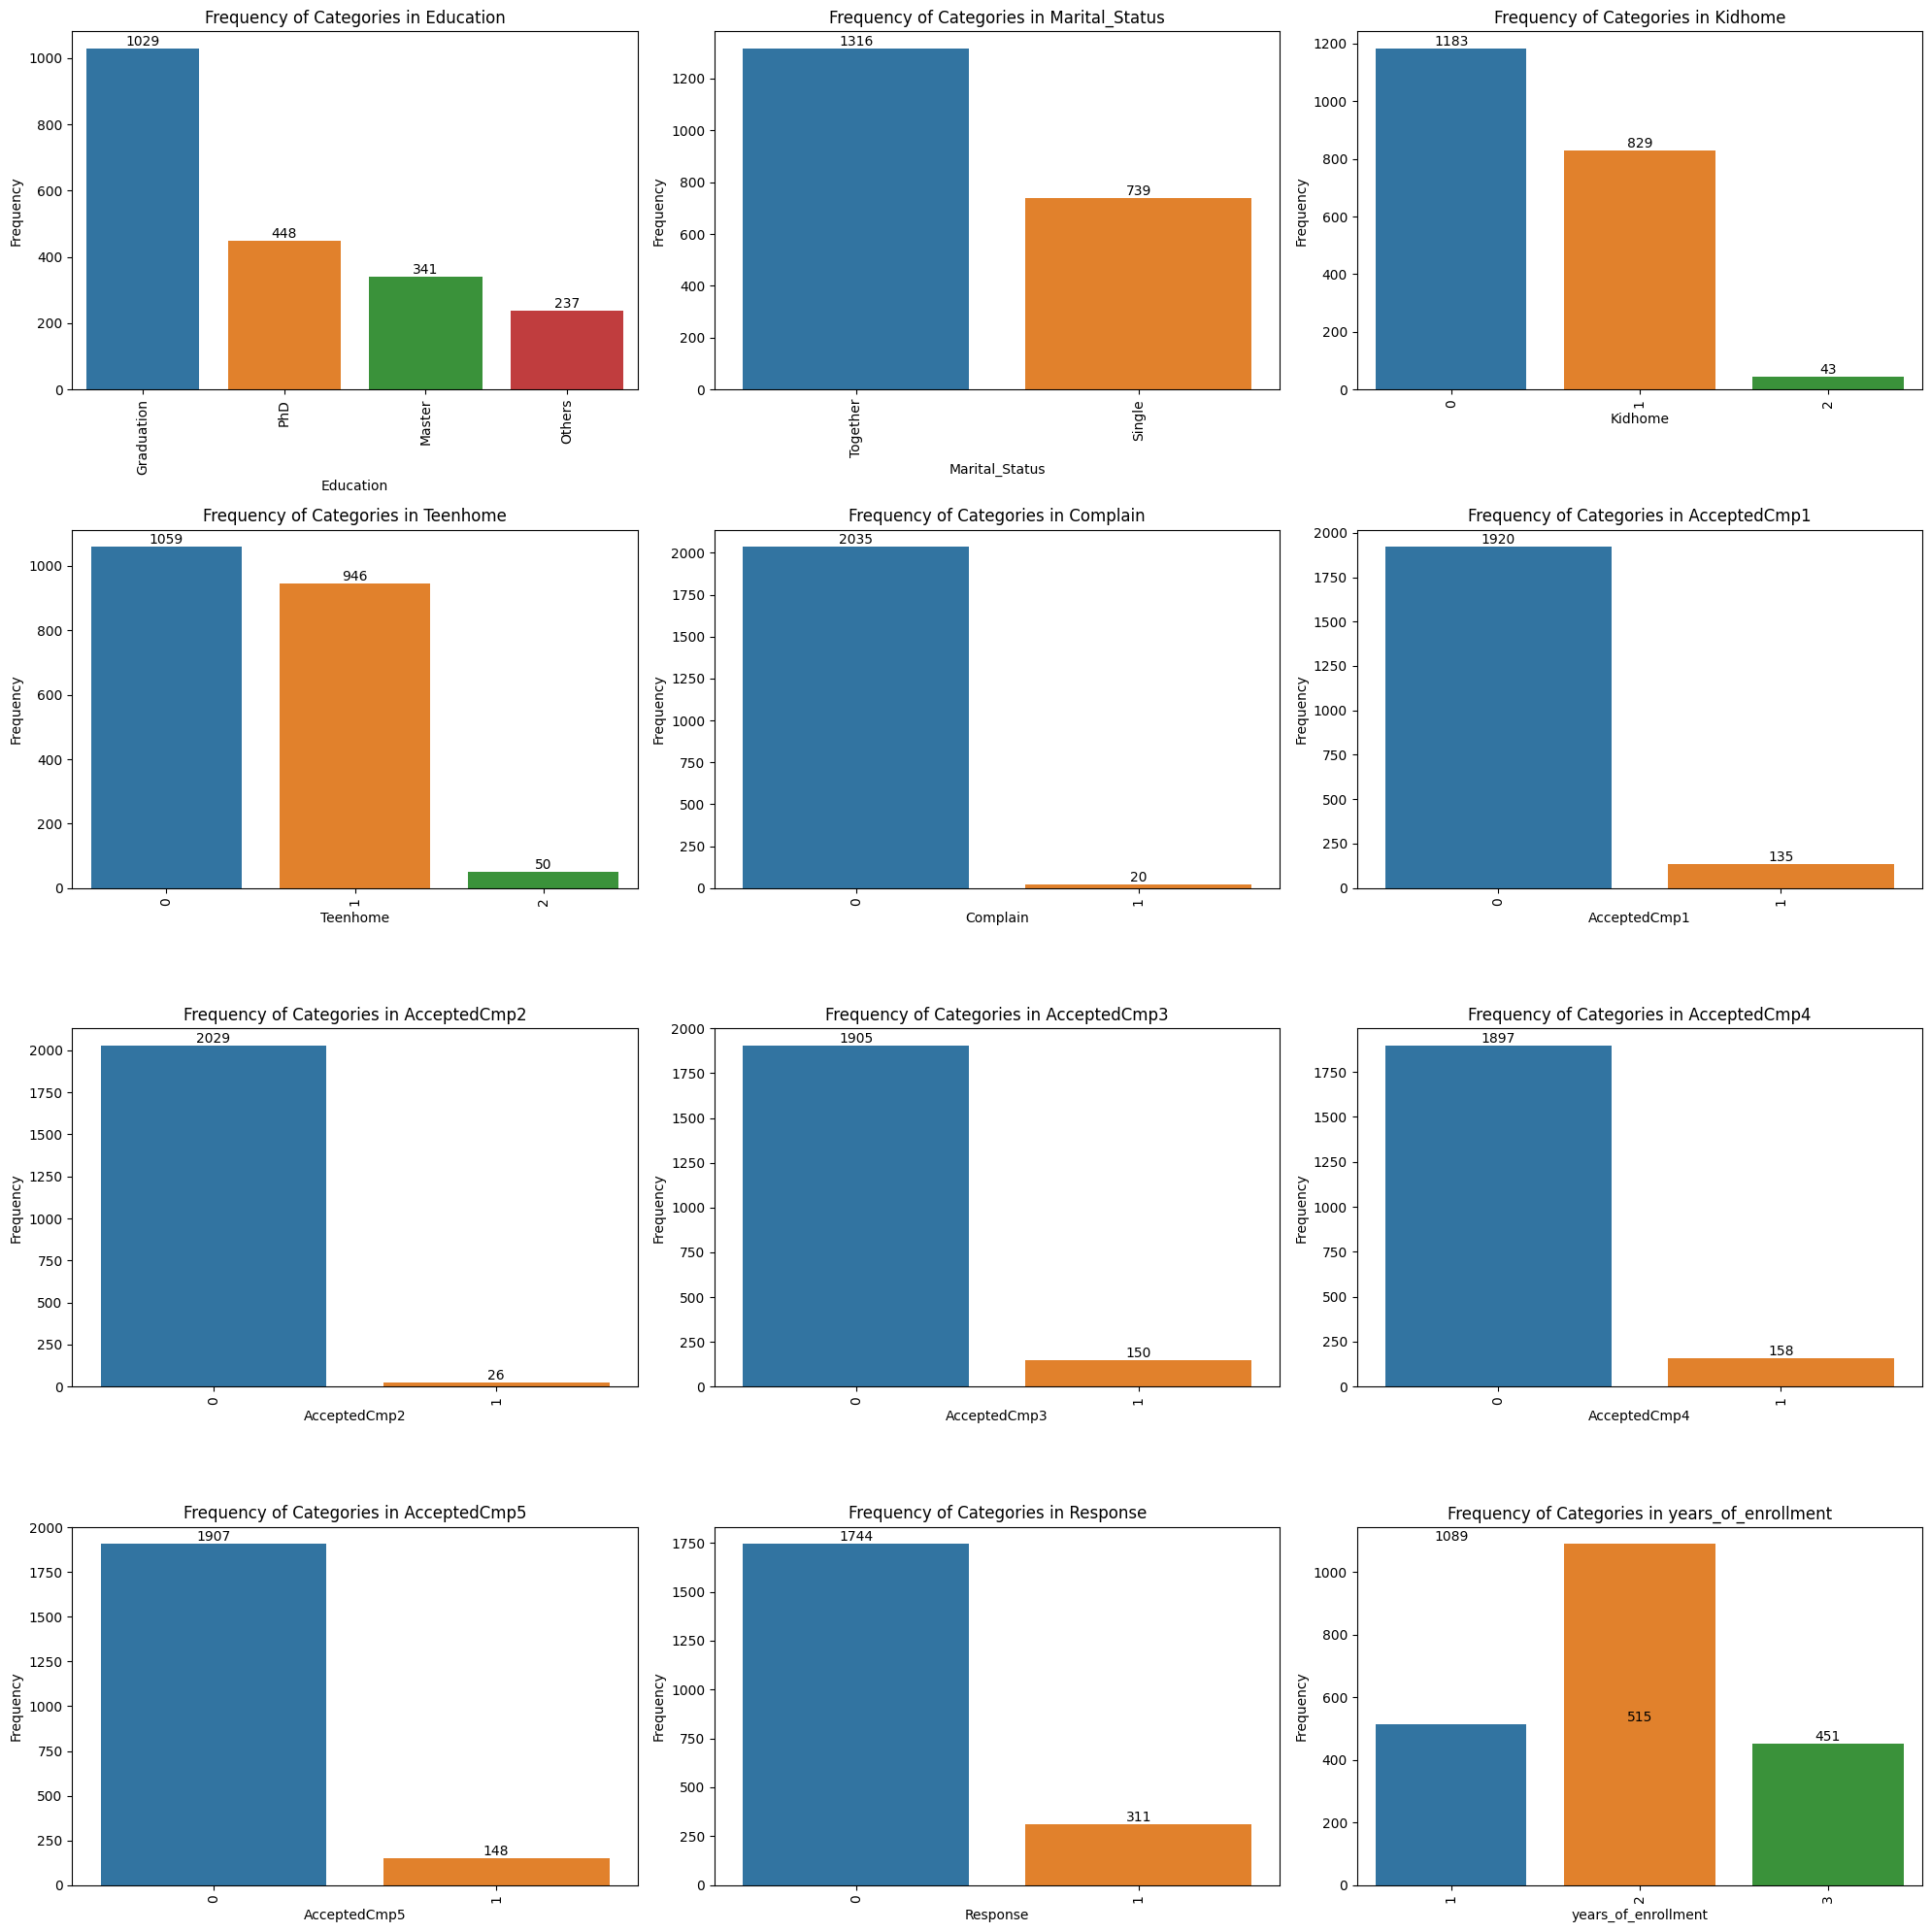

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Specify the columns you want to visualize
categorical_columns = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain',
                       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                       'AcceptedCmp5', 'Response', 'years_of_enrollment']

# Calculate the number of rows and columns needed to arrange the plots in a grid
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten the axes into a 1D array for easy iteration
axes = axes.flatten()

# Define a custom color palette with darker colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#0099FF', '#FF6600']

# Loop through each categorical column and create bar plots with the custom palette
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    
    # Count the frequency of each category in the column
    counts = customer_data[column].value_counts().reset_index()
    counts.columns = [column, 'Frequency']
    
    # Create a bar plot with the custom palette
    sns.barplot(x=column, y='Frequency', data=counts, palette=custom_palette, ax=ax)
    
    # Set plot labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of Categories in {column}')
    
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better visibility if needed
    
    # Add text labels at the top of each bar
    for index, row in counts.iterrows():
        ax.annotate(f"{row['Frequency']}", xy=(index, row['Frequency']), ha='center', va='bottom')

# Remove any empty subplots
for i in range(len(categorical_columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()

# Save the composite figure as an image file
plt.savefig('categorical_column_plots.png')

# Display the figure
plt.show()


#### > The bar charts above show that a majority of customers have college-level education and they live together with partners or spouses.
#### > Majority of partners have no kids or teenagers or may be 1. 
#### > Majority of campains have low acceptence rate buy the last reponse shows that there is a increase  in convertion rate.
#### > Even though there is no high convertion yet there complains is very low. Hence there is no issues with the products.

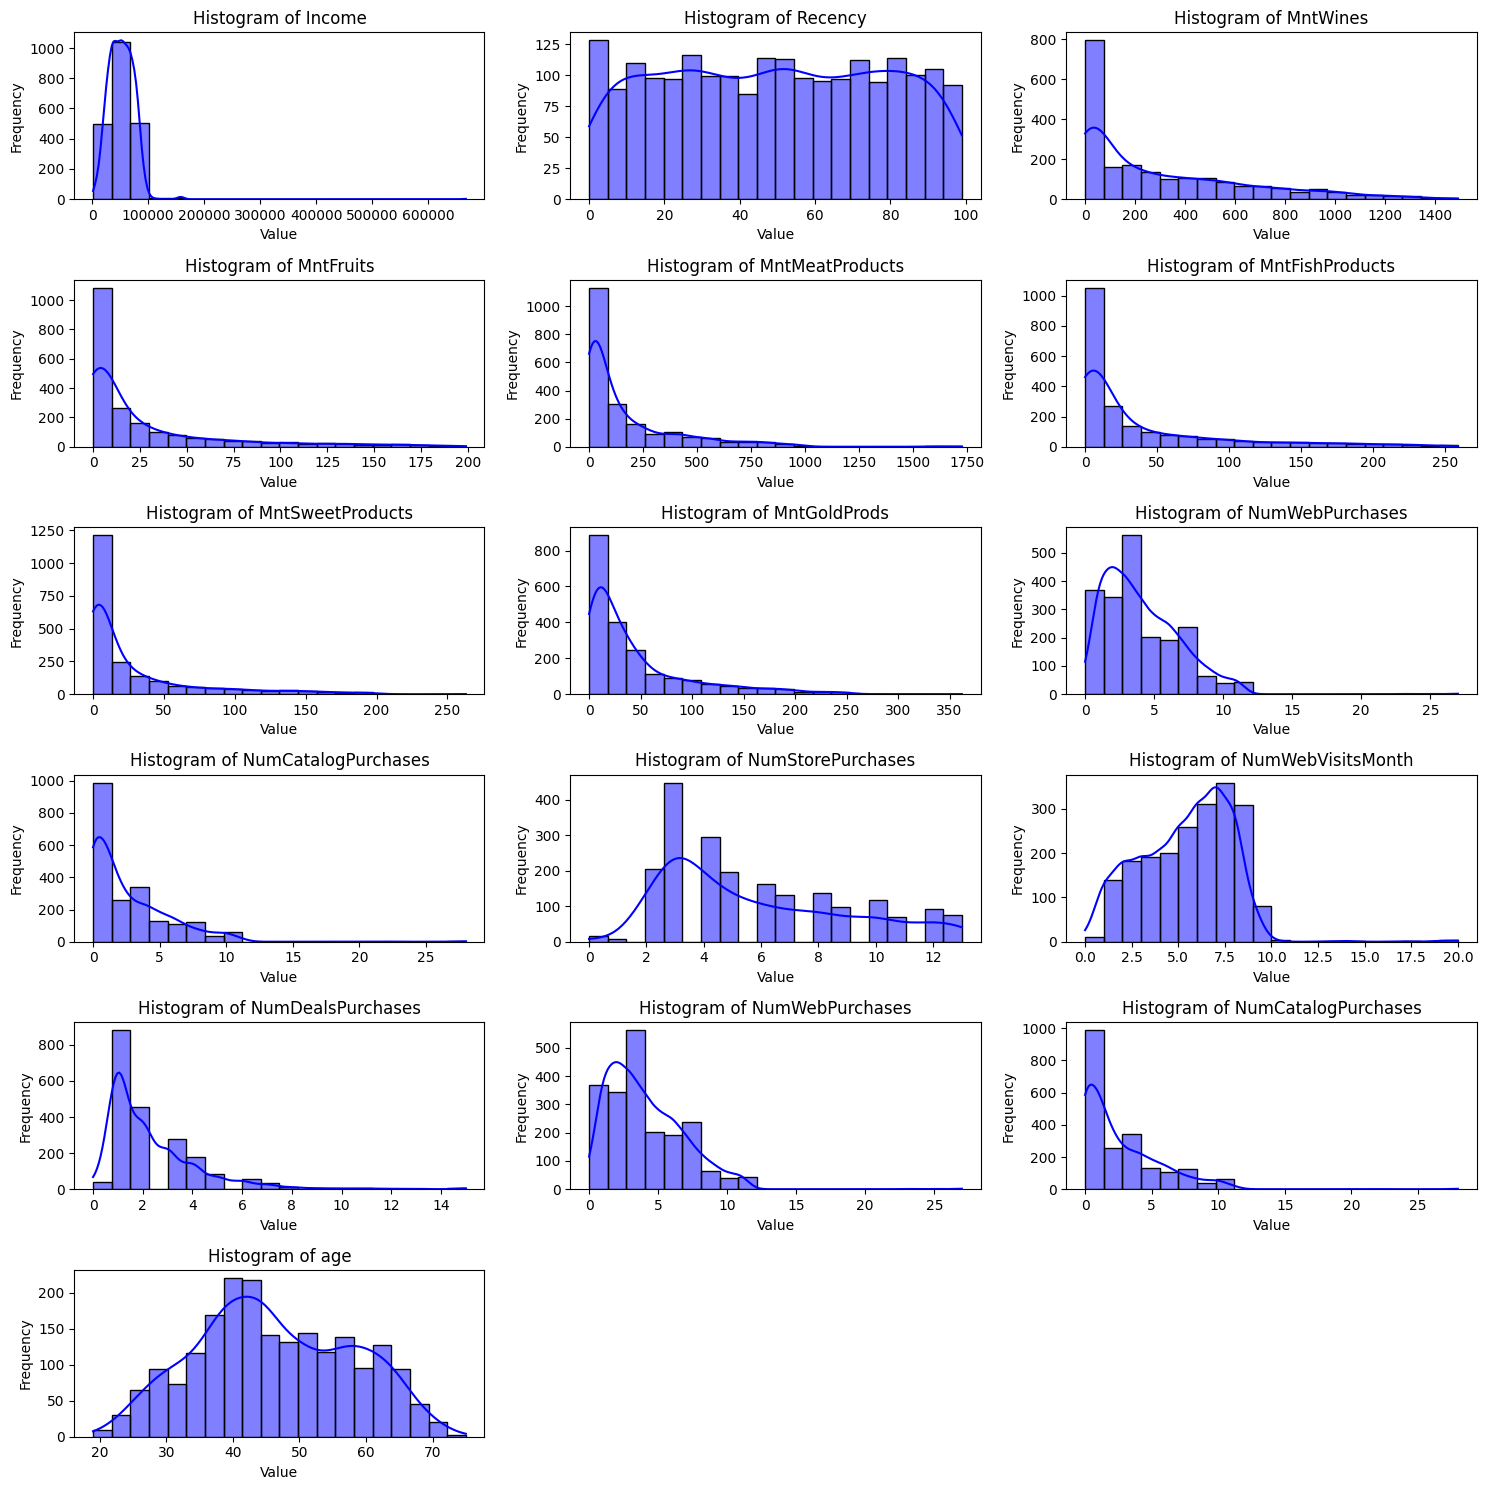

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of numeric columns to plot
selected_cols = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                   'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 
                   'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases', 'NumWebPurchases', 
                   'NumCatalogPurchases', 'age']

# Calculate the number of rows and columns needed for subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(selected_cols) + 2) // n_cols  # Add 2 to ensure enough rows for the plots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Flatten the axes into a 1D array for easy iteration
axes = axes.flatten()

# Loop through the selected columns and create histograms with a KDE line
for i, column in enumerate(selected_cols):
    ax = axes[i]
    
    # Create a histogram with a KDE line
    sns.histplot(data=customer_data, x=column, kde=True, ax=ax, bins=20, color='blue', edgecolor='k')
    
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')
    
# Remove any empty subplots
for i in range(len(selected_cols), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()

# Save the composite figure as an image file
plt.savefig('histogram_plots.png')

# Display the figure
plt.show()


#### The histograms above help us to better understand the distribution of continuous variables.

#### one-hot encoding method to deal with the categorical variables.



In [24]:
#use one hot encoding to deal with categorical variables

# Apply one-hot encoding to the 'Education' column
customer_data = pd.get_dummies(customer_data, columns=['Education'], prefix='Education')

# Map 'Single' to 0 and 'Together' to 1 in the 'Marital_Status' column
customer_data['Marital_Status'] = customer_data['Marital_Status'].map({'Single': 0, 'Together': 1})

# Convert boolean values to binary (0 and 1)
customer_data = customer_data.astype(int)

In [25]:
customer_data.head(5)

,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,years_of_enrollment,Education_Graduation,Education_Master,Education_Others,Education_PhD
0,0,58138,0,0,58,635,88,546,172,88,...,0,0,0,1,58,3,1,0,0,0
1,0,46344,1,1,38,11,1,6,2,1,...,0,0,0,0,61,1,1,0,0,0
2,1,71613,0,0,26,426,49,127,111,21,...,0,0,0,0,50,2,1,0,0,0
3,1,26646,1,0,26,11,4,20,10,3,...,0,0,0,0,31,1,1,0,0,0
4,1,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,34,1,0,0,0,1


## Box Plots for the complete dataset.

In [26]:
customer_data.columns

Index(['Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'age',
       'years_of_enrollment', 'Education_Graduation', 'Education_Master',
       'Education_Others', 'Education_PhD'],
      dtype='object')

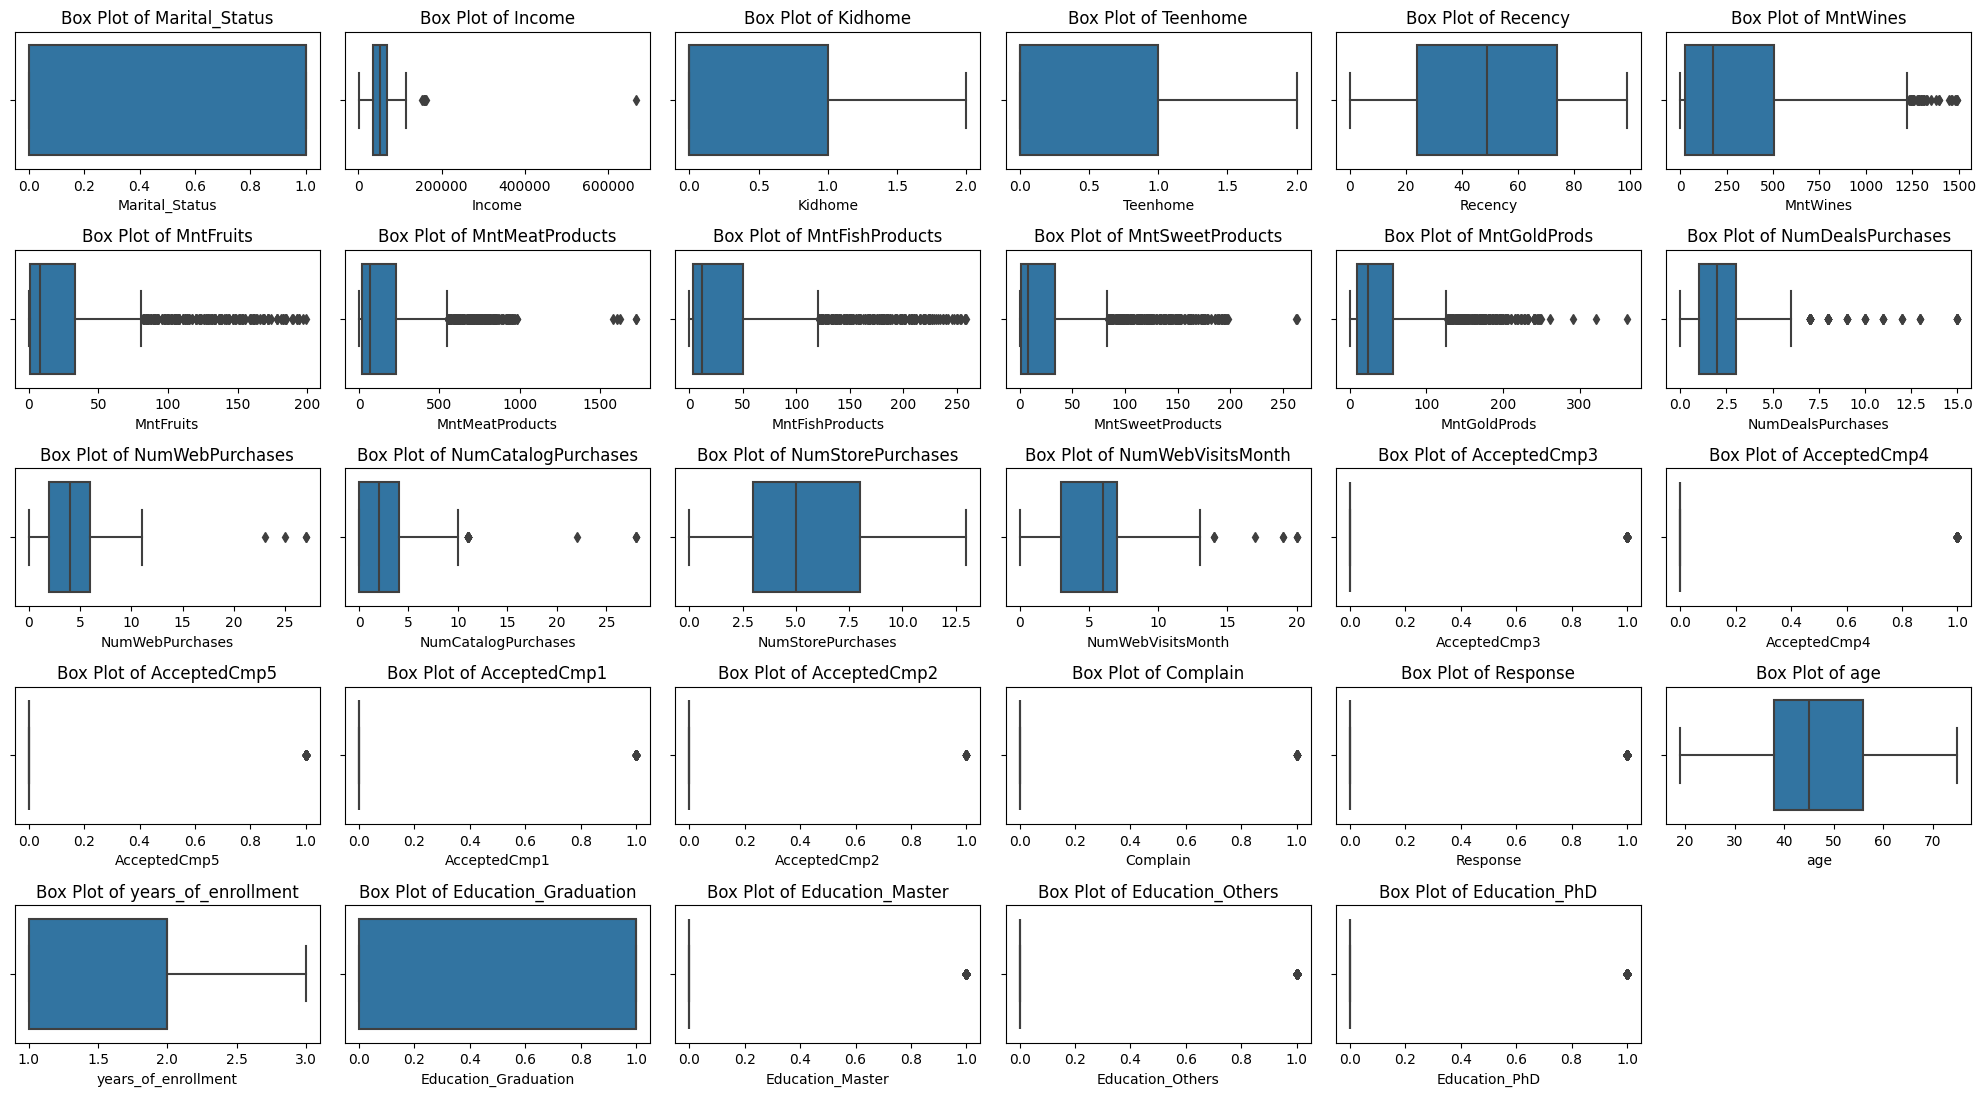

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns for box plots
numeric_columns = ['Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'age',
       'years_of_enrollment', 'Education_Graduation', 'Education_Master',
       'Education_Others', 'Education_PhD']

# Create subplots for box plots
plt.figure(figsize=(20, 15))

# Create box plots for numeric variables
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(7, 6, i)
    sns.boxplot(x=customer_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust the layout
plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
plt.savefig('box_plots.png')

# Show the figure (optional)
plt.show()


## Z scores for the complete dataset.

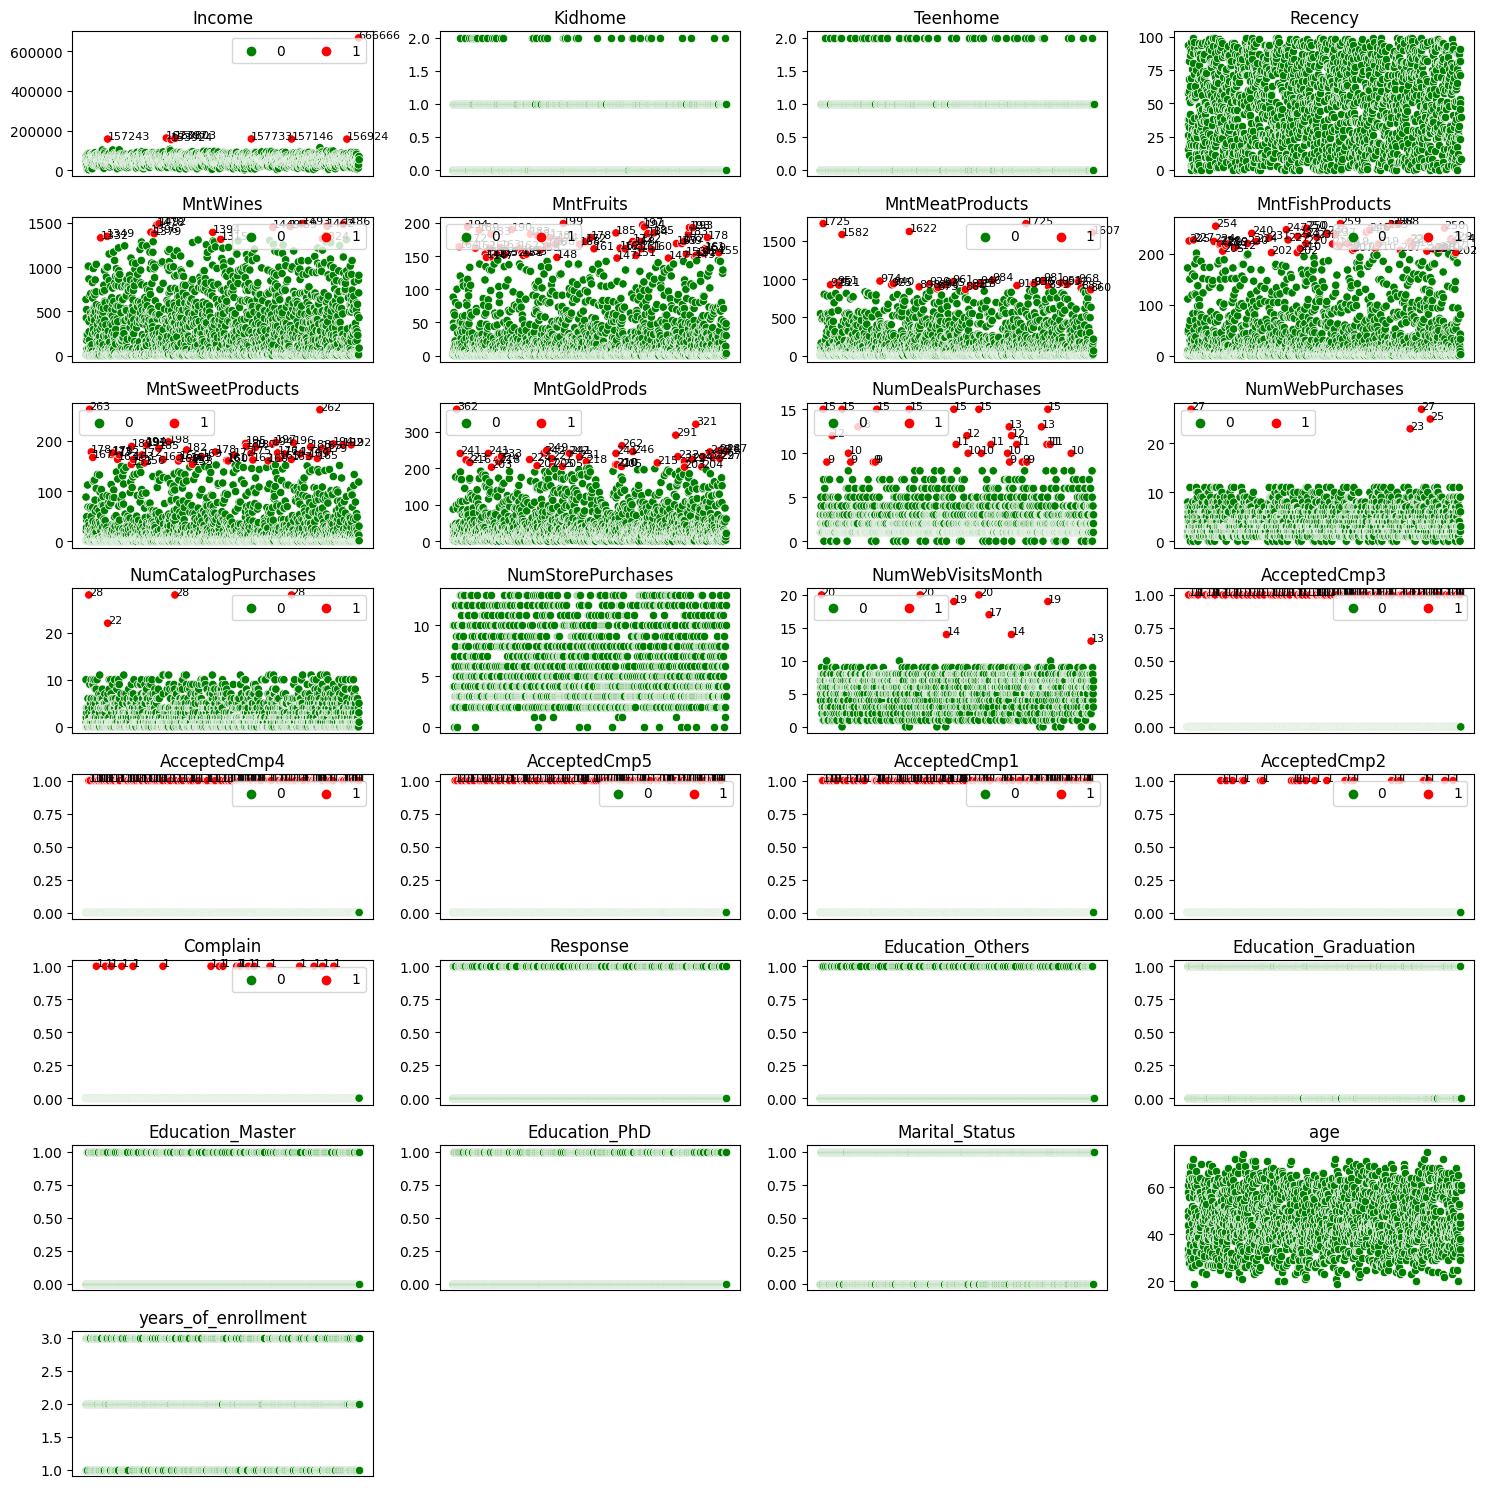

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function for Z-score-based outlier detection
def zscore_outlier(x, lb, ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_

# List of numeric columns for outlier detection
numeric_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
               'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
               'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
               'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
               'Education_Others', 'Education_Graduation', 'Education_Master',
               'Education_PhD', 'Marital_Status', 'age', 'years_of_enrollment']

# Calculate the number of rows and columns needed for subplots
n_cols = 4  # Number of columns in the grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Create subplots for scatter plots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Loop through each numeric column
for n, column in enumerate(numeric_columns):
    row = n // n_cols
    col = n % n_cols
    
    # Reset the index of the customer_data[column] Series
    x = customer_data[column].reset_index(drop=True)
    
    # Apply the Z-score-based outlier detection function
    outliers = zscore_outlier(x, -3, 3)
    
    # Create scatter plots
    if sum(outliers) == 0:
        sns.scatterplot(x=np.arange(len(x)), y=x, ax=ax[row, col], legend=False, color='green')
    else:
        sns.scatterplot(x=np.arange(len(x)), y=x, ax=ax[row, col], hue=outliers, palette=['green', 'red'])
    
    for x, y in zip(np.arange(len(x))[outliers == 1], x[outliers == 1]):
        ax[row, col].text(x=x, y=y, s=y, fontsize=8)
    
    ax[row, col].set_ylabel("")
    ax[row, col].set_title(column)
    ax[row, col].xaxis.set_visible(False)
    
    if sum(outliers) > 0:
        ax[row, col].legend(ncol=2)

# Remove any empty subplots
for n in range(len(numeric_columns), n_rows * n_cols):
    row = n // n_cols
    col = n % n_cols
    fig.delaxes(ax[row, col])

# Adjust the layout
plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
plt.savefig('scatter_plots_with_outliers.png')

# Show the figure (optional)
plt.show()


## Heat map for Variables

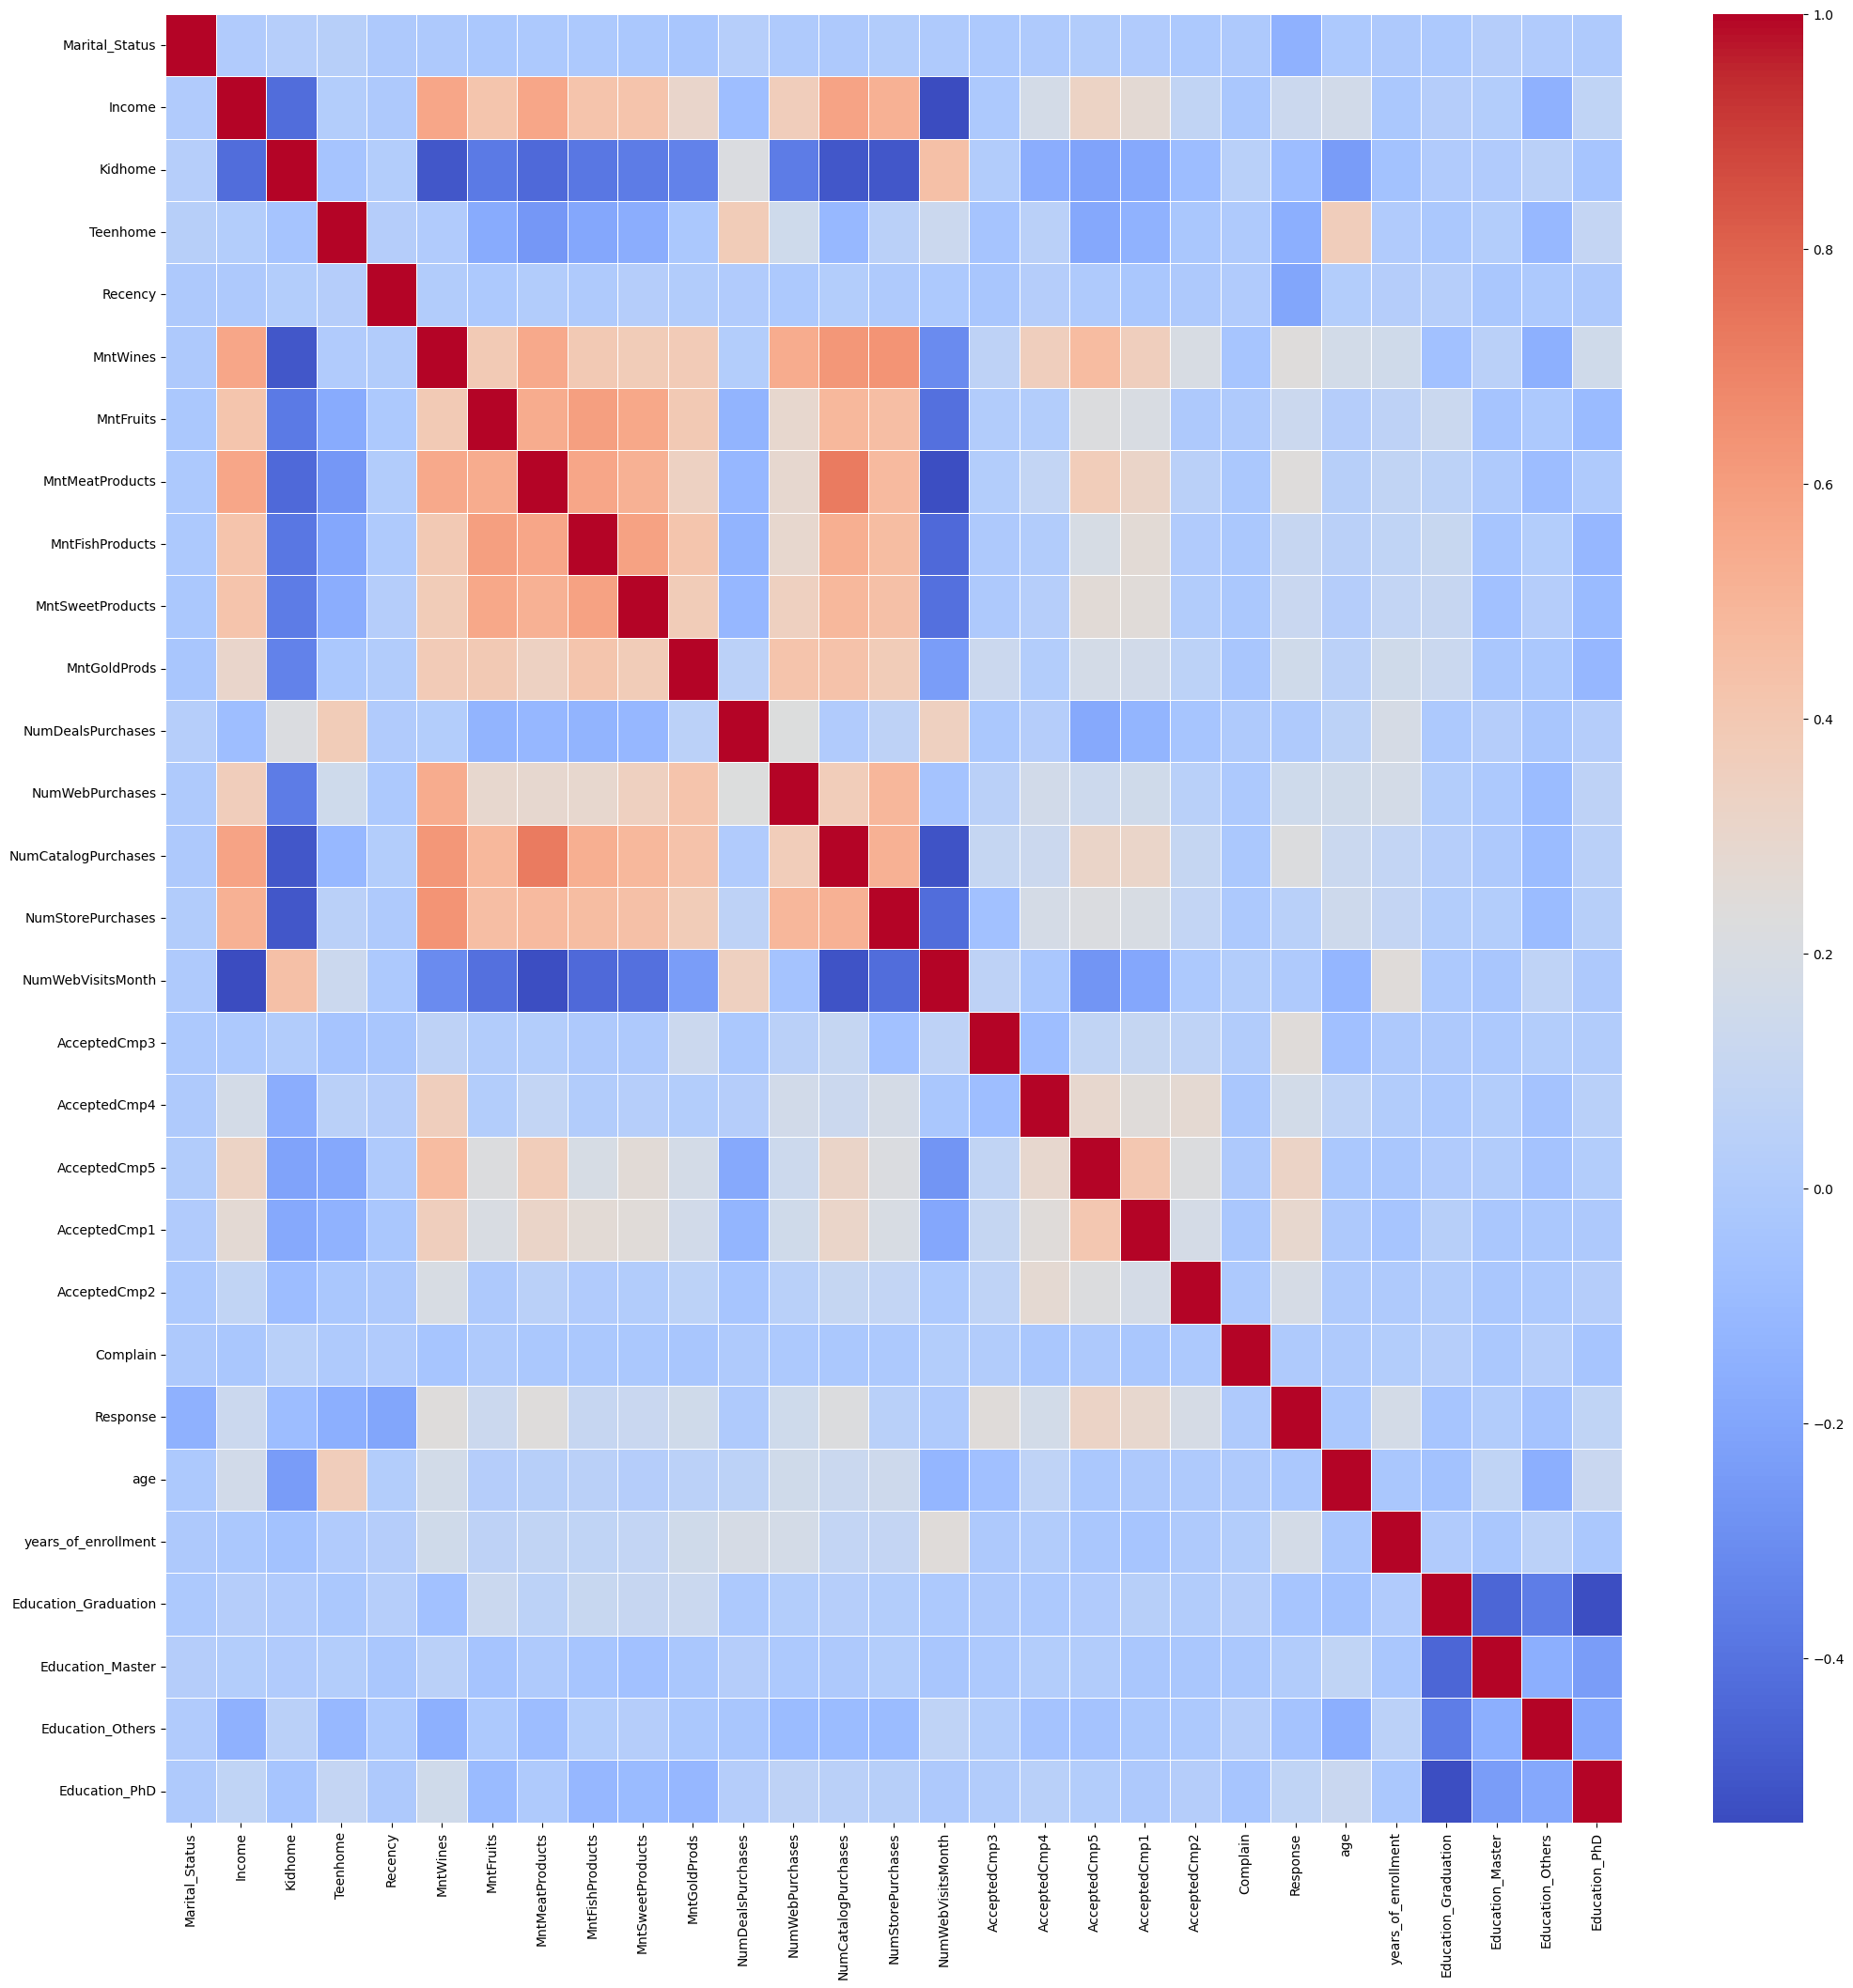

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger heatmap
plt.figure(figsize=(25, 25))

# Generate the heatmap for correlation without displaying numbers
sns.heatmap(customer_data.corr(), cmap='coolwarm', linewidths=.5)

# Save the figure as an image file (e.g., PNG)
plt.savefig('correlation_heatmap.png')

# Show the figure (optional)
plt.show()


#### None of the values is near or equal to 1 or -1. Hence no multicolinearity present.

## Q-Q Plots

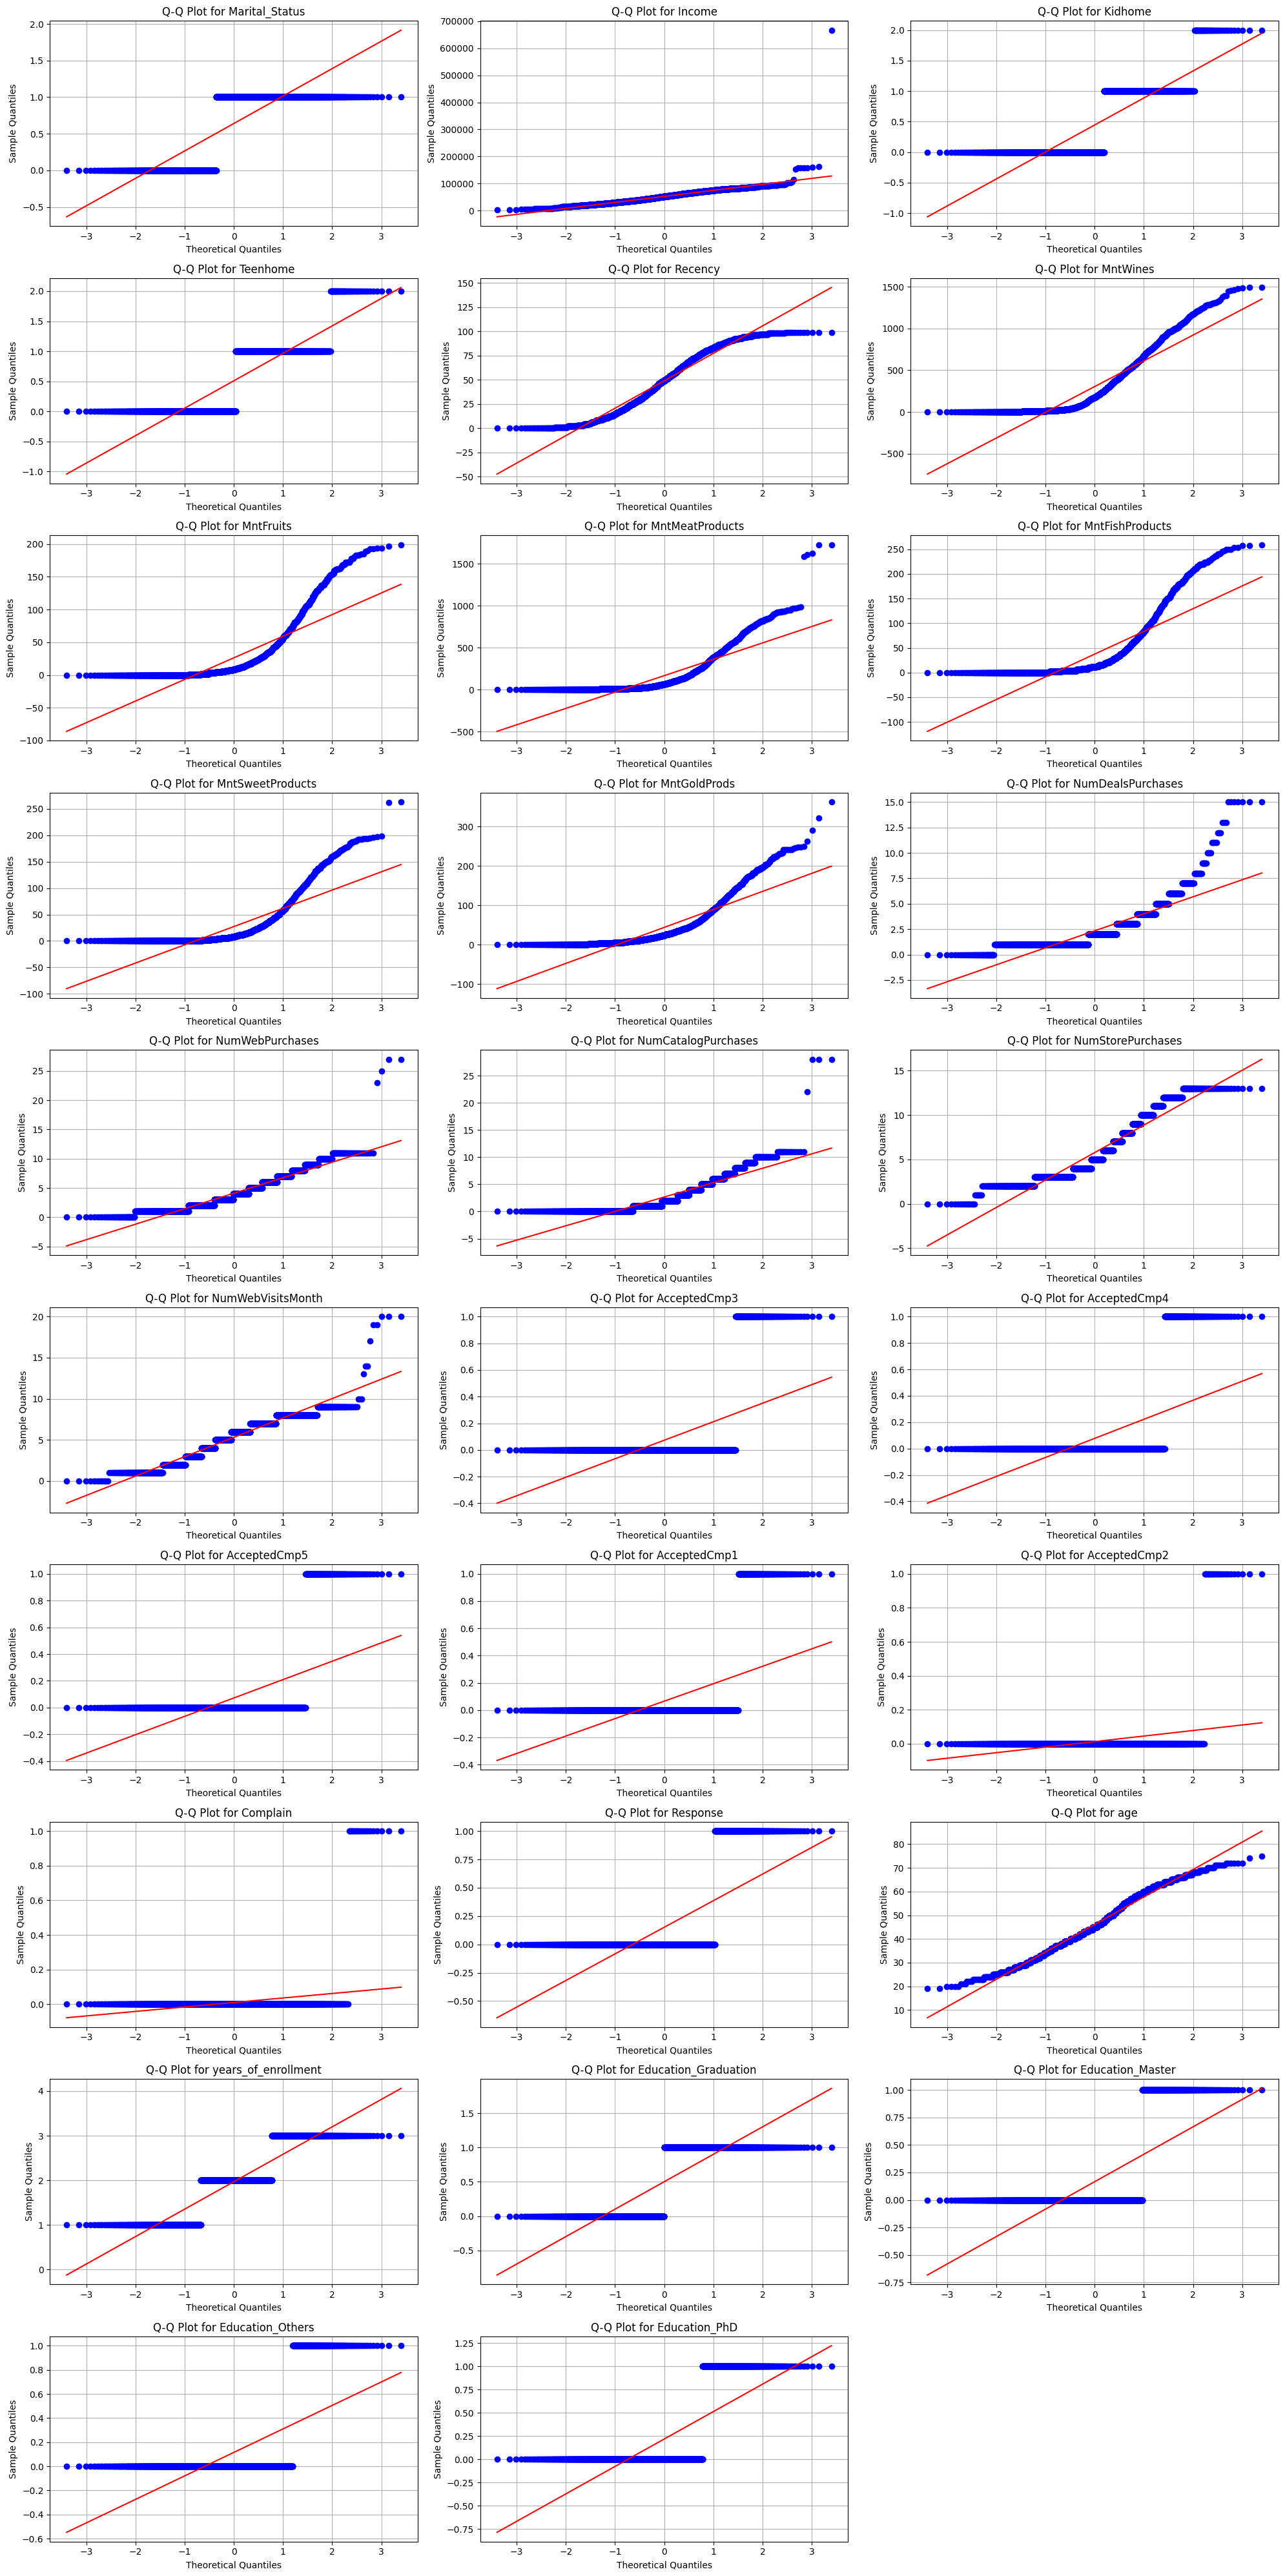

In [83]:
from scipy import stats

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(customer_data.columns) + 2) // n_cols  # Add 2 to ensure enough rows for the plots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))

# Flatten the axes into a 1D array for easy iteration
axes = axes.flatten()

# Loop through each column and create Q-Q plots
for i, col in enumerate(customer_data.columns):
    ax = axes[i]
    stats.probplot(customer_data[col], dist="norm", plot=ax)
    ax.set_title(f"Q-Q Plot for {col}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Sample Quantiles")
    ax.grid(True)

# Remove any empty subplots
for i in range(len(customer_data.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
plt.savefig('qq_plots.png')

# Show the figure
plt.show()


#### Each of the Q-Q plot shows that each of the feature is normally distributed.
#### Hence we can use Standardization for transformation.

In [31]:
#get a duplicate of the customer data

customer_data_org1= customer_data.copy()

In [32]:
#get a duplicate of the customer data

customer_data_org2= customer_data.copy()

In [33]:
#get a duplicate of the customer data

customer_data_org3= customer_data.copy()

### Standardization

In [34]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data (assuming customer_data is a DataFrame)
scaled_data = scaler.fit_transform(customer_data.iloc[:, 1:])

# Create a DataFrame with the standardized data
columns = customer_data.columns[1:]  # Exclude the first column if it's an index or non-numeric
scaled_df = pd.DataFrame(data=scaled_data, columns=columns)

#### Before conducting PCA, I first standardize the continuous variables to a mean of 0 and standard deviation of 1 so each one of them contribues equally to the analysis.

## Transformations

## Principal Component Analysis (PCA)


#### Since it is a multivariate dataset and the variables are correlated with each other, I will first use the Principal Component Analysis (PCA) to reduce the dimensionality of the data. By transforming a large set of correlated variables with several uncorrelated new variables (principal components), PCA helps us to produce a more simple dataset for further machine learning while at the same time retaining as much information as possible.

In [35]:
#conduct PCA on cleaned customer
#set the number of components as the total number of columns of 30
pca= PCA(n_components=28)
pca.fit(scaled_df)

PCA(n_components=28)

#### Since the dataset has 28 columns, there are a maximum of 28 principal components. I use n_components=28 in the PCA algorithm.

In [36]:
#show how much variance has been explained by each of the 30 principal components
print(pca.explained_variance_ratio_)

#print the eigenvalues
print(pca.explained_variance_)

[2.31551201e-01 7.75496655e-02 6.93471005e-02 6.19186246e-02
 5.37137640e-02 4.40292935e-02 4.28428649e-02 3.70373858e-02
 3.59610444e-02 3.55645703e-02 3.14362676e-02 2.92304429e-02
 2.69011553e-02 2.47975819e-02 2.17093394e-02 2.14364446e-02
 2.03262907e-02 1.87748575e-02 1.81901229e-02 1.66731006e-02
 1.56940392e-02 1.46700598e-02 1.34075484e-02 1.11136564e-02
 1.03199136e-02 8.69739579e-03 7.10626956e-03 4.56654224e-32]
[6.48659011e+00 2.17244779e+00 1.94266415e+00 1.73456556e+00
 1.50471761e+00 1.23342042e+00 1.20018425e+00 1.03755169e+00
 1.00739946e+00 9.96292781e-01 8.80644029e-01 8.18850869e-01
 7.53599064e-01 6.94670332e-01 6.08157443e-01 6.00512668e-01
 5.69413227e-01 5.25951949e-01 5.09571408e-01 4.67074104e-01
 4.39647037e-01 4.10961655e-01 3.75594125e-01 3.11333879e-01
 2.89098262e-01 2.43645644e-01 1.99072420e-01 1.27925434e-30]


#### The output shows 1) the percentage of variance that can be explained by each principal components and 2) the eigenvalues.

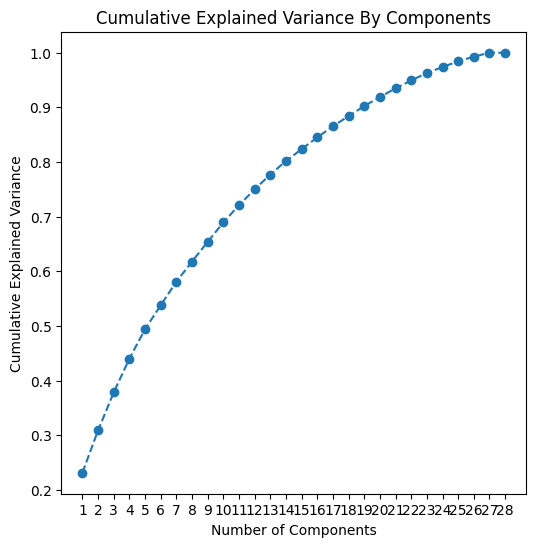

In [37]:
plt.figure(figsize=(6, 6))
plt.plot(range(1, 29), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xticks(range(1, 29))
plt.title('Cumulative Explained Variance By Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Save the figure as an image file (e.g., PNG)
plt.savefig('scree_plot.png')

# Show the figure (optional)
plt.show()


#### The plot above shows the relationship between number of components and the cumulative explained variance. The first 6 PC explain approximately 58% of the total variance and each of them have eigenvalues greater than 1. Thus, retaining four principal components should be appropriate.

In [38]:
#keep the first six principal components
random.seed(123)

pca_fit= PCA(n_components= 6, svd_solver = 'full')
PrincipalComponents= pca_fit.fit_transform(scaled_df)

#get the final dataset after the PCA 
random.seed(123)

PrincipalDF= pd.DataFrame(data= PrincipalComponents,
                          columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

#### Run PCA using the first 6 PCs and transform the dataset represented by those 6 PCs.

In [39]:
#check PrincipalDF
PrincipalDF.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.858627,-0.263475,-0.877057,2.400823,-0.847134,-0.420346
1,-2.366409,-0.292552,-0.537679,-0.801350,1.942953,-0.069554
2,1.658639,-0.499176,-1.286757,0.096824,0.532861,-0.139993
3,-2.510111,-1.800332,0.119044,0.208928,1.062704,-0.086061
4,-0.528412,0.133256,0.022898,-0.981346,-0.633567,-1.419813


# K-Means Algorithm

#### After the data dimensionality has been reduced, I'd like to use K-Means algorithm to cluster the data into multiple groups so that customers within the same group share great similairites. K-means is a simple and popular unsupervised learning algorithm that can be applied to many real-world senarios like customer segmentation, document clustering, image segmentation, etc.

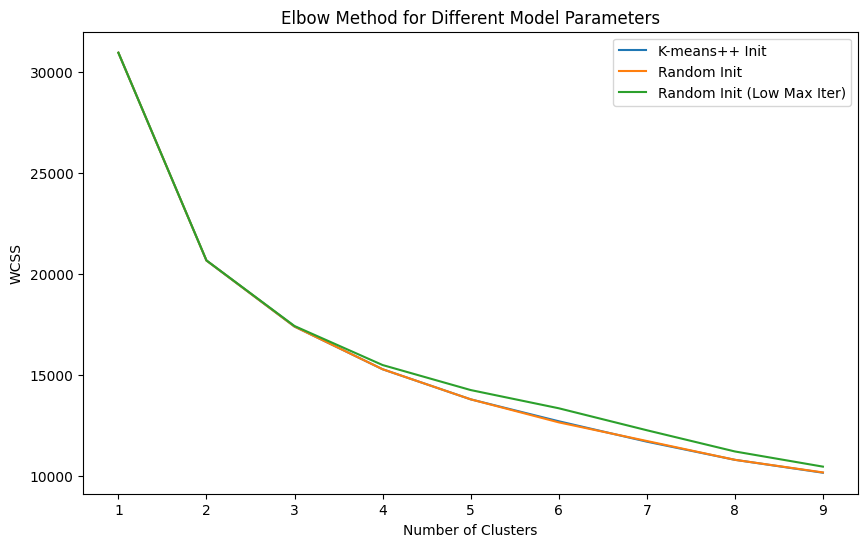

In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of clusters
clusters_range = range(1, 10)

# Initialize lists to store the WCSS values for different parameter settings
wcss_default = []
wcss_random_init = []
wcss_low_max_iter = []

# Loop through the cluster range and compute WCSS for each model configuration
for i in clusters_range:
    kmeans_default = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_random_init = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=42)
    kmeans_low_max_iter = KMeans(n_clusters=i, init='random', max_iter=3, n_init=10, random_state=42)
    
    kmeans_default.fit(PrincipalDF)
    kmeans_random_init.fit(PrincipalDF)
    kmeans_low_max_iter.fit(PrincipalDF)
    
    wcss_default.append(kmeans_default.inertia_)
    wcss_random_init.append(kmeans_random_init.inertia_)
    wcss_low_max_iter.append(kmeans_low_max_iter.inertia_)

# Create a single graph to display all three elbow method plots
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, wcss_default, label='K-means++ Init')
plt.plot(clusters_range, wcss_random_init, label='Random Init')
plt.plot(clusters_range, wcss_low_max_iter, label='Random Init (Low Max Iter)')

plt.title('Elbow Method for Different Model Parameters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()

# Save the figure as an image file (e.g., PNG)
plt.savefig('elbow_method_plots.png')

# Show the figure
plt.show()


### By experimenting with different model parameter, there is little change in the WCSS. We still pick 3 as the number of clusters.

In [41]:

#fitting K-means to the dataset
random.seed(123)

kmeans_model= KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

#return the cluster assignment
random.seed(123)

cluster_assignment= kmeans_model.fit_predict(PrincipalDF)

In [42]:
#assign the cluster assignment back to the cleaned_customer dataset

customer_data_org1['cluster']= cluster_assignment

In [43]:
customer_data_org1.head(5)

,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,age,years_of_enrollment,Education_Graduation,Education_Master,Education_Others,Education_PhD,cluster
0,0,58138,0,0,58,635,88,546,172,88,...,0,0,1,58,3,1,0,0,0,0
1,0,46344,1,1,38,11,1,6,2,1,...,0,0,0,61,1,1,0,0,0,1
2,1,71613,0,0,26,426,49,127,111,21,...,0,0,0,50,2,1,0,0,0,0
3,1,26646,1,0,26,11,4,20,10,3,...,0,0,0,31,1,1,0,0,0,1
4,1,58293,1,0,94,173,43,118,46,27,...,0,0,0,34,1,0,0,0,1,1


# Customer Analytics

### Based on the cluster assignment for each individual customer, I'd like to examine the customer charateristics for each cluster.

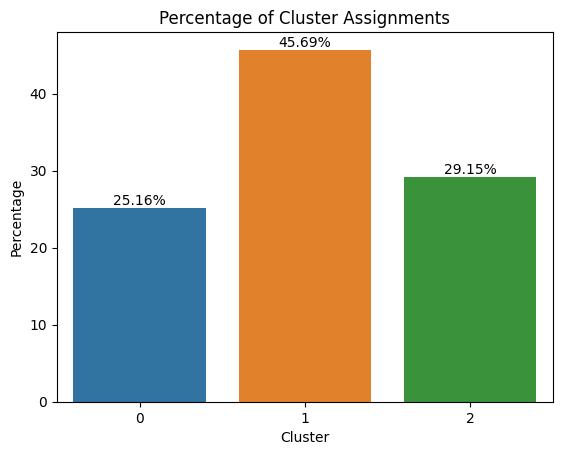

In [81]:
# Create a DataFrame with cluster counts and percentages
cluster_count = pd.DataFrame(customer_data_org1.groupby(['cluster']).size().reset_index(name='count'))
cluster_count['percentage'] = round(100 * cluster_count['count'] / cluster_count['count'].sum(), 2)

# Create a bar chart
ax = sns.barplot(data=cluster_count, x='cluster', y='percentage')
plt.title('Percentage of Cluster Assignments')
plt.xlabel('Cluster')
plt.ylabel('Percentage')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Save the figure as an image file (e.g., PNG)
plt.savefig('cluster_percentage_bar_chart.png')

# Show the figure
plt.show()


### Approximately 45.69% of the customers have been assigned to cluster 1, while 25.16% and 29.15% has been assigned to cluster 0 and 2, respectively.

# DBSCAN

In [45]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 2, min_samples = 5).fit(PrincipalDF)
# Print the cluster labels
print(clustering.labels_)

[0 0 0 ... 0 0 0]


In [46]:
#keep the first Two principal components
random.seed(123)

pca_fit= PCA(n_components= 2, svd_solver = 'full')
PrincipalComponents= pca_fit.fit_transform(scaled_df)

#get the final dataset after the PCA 
random.seed(123)

DF_DBSCAN= pd.DataFrame(data= PrincipalComponents,
                          columns= ['PC1', 'PC2'])

In [47]:
DF_DBSCAN

,PC1,PC2
0,3.858627,-0.263475
1,-2.366409,-0.292552
2,1.658639,-0.499176
3,-2.510111,-1.800332
4,-0.528412,0.133256
...,...,...
2050,4.928775,0.677973
2051,2.396980,0.559573
2052,1.446519,-0.248408
2053,1.669978,1.057288


In [48]:
# Add the cluster labels to the DataFrame
DF_DBSCAN['Cluster_Labels'] = clustering.labels_

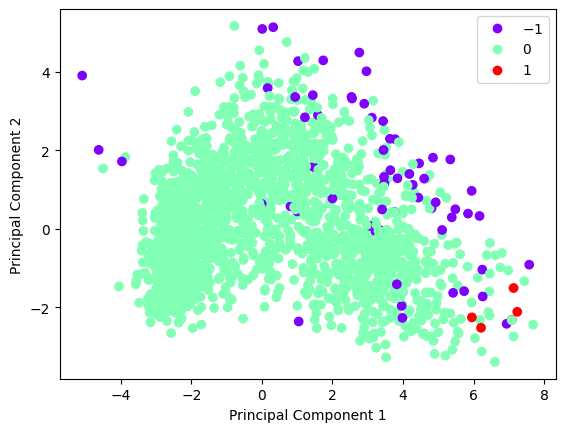

In [84]:
# Create a scatter plot based on the first two principal components
scatter = plt.scatter(
    DF_DBSCAN['PC1'], 
    DF_DBSCAN['PC2'], 
    c=DF_DBSCAN['Cluster_Labels'], 
    cmap='rainbow'
)

# Add a legend
plt.legend(*scatter.legend_elements())

# Add labels for the x and y axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save the figure as an image file (e.g., PNG)
plt.savefig('scatter_plot.png')

# Show the plot
plt.show()


# Hierarchical clustering

In [50]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

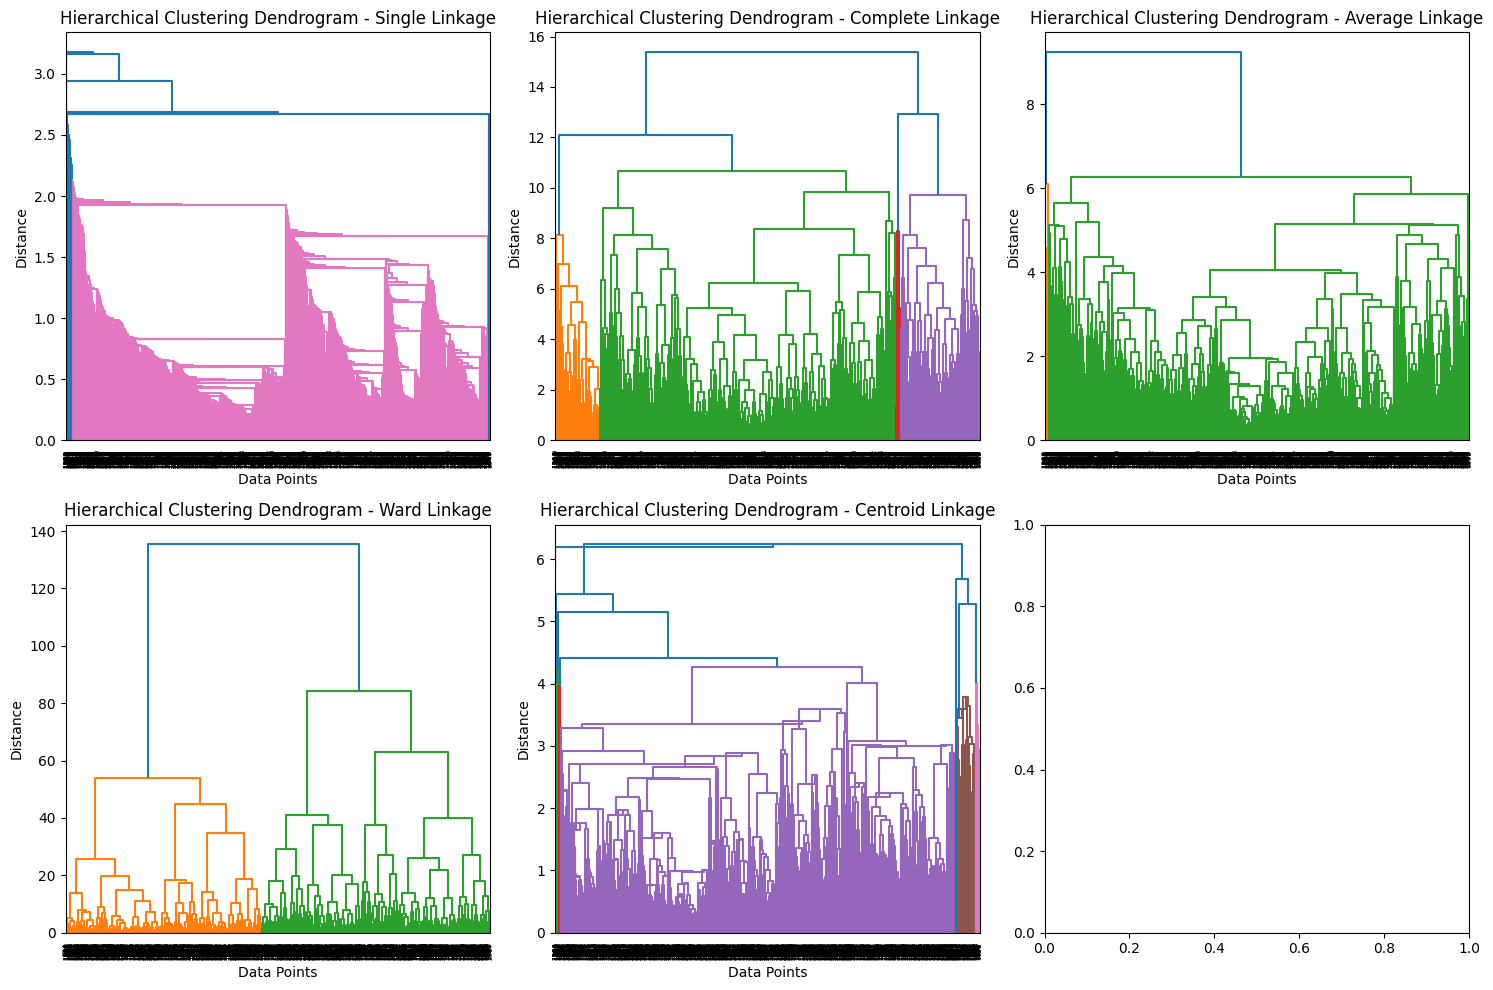

In [51]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Define the linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward', 'centroid']
titles = ['Single Linkage', 'Complete Linkage', 'Average Linkage', 'Ward Linkage', 'Centroid Linkage']

# Create dendrograms for each linkage method
for i, method in enumerate(linkage_methods):
    row = i // 3
    col = i % 3
    
    ax = axes[row, col]
    dendrogram = sch.dendrogram(sch.linkage(PrincipalDF, method=method), ax=ax)
    ax.set_xlabel('Data Points')
    ax.set_ylabel('Distance')
    ax.set_title(f'Hierarchical Clustering Dendrogram - {titles[i]}')

# Adjust layout
plt.tight_layout()

# Save the figure with good resolution
plt.savefig('dendrograms.png', dpi=300)

# Show the figure
plt.show()


### From the dendrogram we can see different clustering.
### Single linkage - 2 clusters
### Complete linkage - 5 clusters
### Average linkage - 2 clusters
### Centroid linkage - 3 clusters
### Ward linkage - 4 clusters

### So on an average we can say that we need 3 cluster classification

# Considering all the three clustering methods we can say that 3 is the optimized number of clusters that can be formed.  

In [52]:
customer_data_org1.head(5)

,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,age,years_of_enrollment,Education_Graduation,Education_Master,Education_Others,Education_PhD,cluster
0,0,58138,0,0,58,635,88,546,172,88,...,0,0,1,58,3,1,0,0,0,0
1,0,46344,1,1,38,11,1,6,2,1,...,0,0,0,61,1,1,0,0,0,1
2,1,71613,0,0,26,426,49,127,111,21,...,0,0,0,50,2,1,0,0,0,0
3,1,26646,1,0,26,11,4,20,10,3,...,0,0,0,31,1,1,0,0,0,1
4,1,58293,1,0,94,173,43,118,46,27,...,0,0,0,34,1,0,0,0,1,1


In [53]:
# Separate the 'cluster' column as y (target variable)
y = customer_data_org1['cluster']

# Remove the 'cluster' column from the original dataset to create X (features)
X = customer_data_org1.drop(columns=['cluster'])

In [54]:
y.head(5)

0    0
1    1
2    0
3    1
4    1
Name: cluster, dtype: int32

In [55]:
X.head(5)

,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,years_of_enrollment,Education_Graduation,Education_Master,Education_Others,Education_PhD
0,0,58138,0,0,58,635,88,546,172,88,...,0,0,0,1,58,3,1,0,0,0
1,0,46344,1,1,38,11,1,6,2,1,...,0,0,0,0,61,1,1,0,0,0
2,1,71613,0,0,26,426,49,127,111,21,...,0,0,0,0,50,2,1,0,0,0
3,1,26646,1,0,26,11,4,20,10,3,...,0,0,0,0,31,1,1,0,0,0
4,1,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,34,1,0,0,0,1


# Model building using various classification models.

In [56]:
# Importing train - test split , K-fold Cross validation and accuracy score and classification report 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=["Model", "Accuracy"])

In [57]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate the first model (Logistic Regression)
model_name = "Logistic Regression"

# Train a logistic regression classifier
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = log_classifier.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1:.2f}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy1]

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        95
           1       0.91      0.96      0.94       187
           2       0.78      0.74      0.76       129

    accuracy                           0.85       411
   macro avg       0.83      0.82      0.83       411
weighted avg       0.84      0.85      0.84       411



In [58]:
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate the first model (Logistic Regression)
model_name = "Decision Tree Classifier"

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy2)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy2]

Accuracy: 0.8832116788321168
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        95
           1       0.93      0.96      0.95       187
           2       0.83      0.81      0.82       129

    accuracy                           0.88       411
   macro avg       0.87      0.87      0.87       411
weighted avg       0.88      0.88      0.88       411



In [59]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate the first model (Logistic Regression)
model_name = "Random Forest Classifier"

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy3)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy3]

Accuracy: 0.927007299270073
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        95
           1       0.97      0.96      0.97       187
           2       0.87      0.91      0.89       129

    accuracy                           0.93       411
   macro avg       0.92      0.92      0.92       411
weighted avg       0.93      0.93      0.93       411



In [60]:
from sklearn.svm import SVC

# Train and evaluate the first model (Logistic Regression)
model_name = "SVC"

# Initialize an SVM classifier (SVC)
classifier = SVC(kernel='sigmoid', C=1)

# Train the SVM classifier
classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy4)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy4]

Accuracy: 0.25060827250608275
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.05      0.04        95
           1       0.36      0.52      0.43       187
           2       0.00      0.00      0.00       129

    accuracy                           0.25       411
   macro avg       0.13      0.19      0.16       411
weighted avg       0.17      0.25      0.20       411



In [61]:
from sklearn.naive_bayes import MultinomialNB

# Train and evaluate the first model (Logistic Regression)
model_name = "Multinomial Naive Bayes"

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy5 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy5)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy5]

Accuracy: 0.851581508515815
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        95
           1       0.91      0.97      0.94       187
           2       0.78      0.74      0.76       129

    accuracy                           0.85       411
   macro avg       0.84      0.83      0.83       411
weighted avg       0.85      0.85      0.85       411



In [62]:
from sklearn.naive_bayes import GaussianNB 

# Train and evaluate the first model (Logistic Regression)
model_name = "Gaussian Naive Bayes"

# Train a Multinomial Naive Bayes classifier
classifier_mb = GaussianNB()
classifier_mb.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = classifier_mb.predict(X_test)

# Evaluate the model
accuracy6 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy6)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy6]

Accuracy: 0.9075425790754258
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        95
           1       0.93      0.96      0.95       187
           2       0.88      0.82      0.85       129

    accuracy                           0.91       411
   macro avg       0.90      0.90      0.90       411
weighted avg       0.91      0.91      0.91       411



In [63]:
import xgboost as xgb

# Train and evaluate the first model (Logistic Regression)
model_name = "XGBM"

# Create an XGBoost classifier for classification
clf = xgb.XGBClassifier()  # For multi-class classification

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy7 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy7:.2f}")

# Optionally, print a classification report
print(classification_report(y_test, y_pred))

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy7]

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        95
           1       0.97      0.98      0.98       187
           2       0.92      0.91      0.92       129

    accuracy                           0.95       411
   macro avg       0.94      0.94      0.94       411
weighted avg       0.95      0.95      0.95       411



In [64]:
import lightgbm as lgb

model_name = "LGBM"

# Define the hyperparameters for the LightGBM model for binary classification
params = {
    'objective': 'binary',  # Binary classification
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',  # Logarithmic loss for binary classification
    # Add other hyperparameters as needed
}

# Create a LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=y_train)

# Train the LightGBM model
num_round = 100  # Number of boosting rounds (you can adjust this)
bst = lgb.train(params, train_data, num_round)

# Predict on the test set
y_pred_prob = bst.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_prob]

# Calculate accuracy on the test set
accuracy8 = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy:", accuracy8)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy8]

[LightGBM] [Info] Number of positive: 1222, number of negative: 422
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1528
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.743309 -> initscore=1.063239
[LightGBM] [Info] Start training from score 1.063239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Test Accuracy: 0.6690997566909975


In [65]:
result_df

,Model,Accuracy
0,Logistic Regression,0.846715
1,Decision Tree Classifier,0.883212
2,Random Forest Classifier,0.927007
3,SVC,0.250608
4,Multinomial Naive Bayes,0.851582
5,Gaussian Naive Bayes,0.907543
6,XGBM,0.946472
7,LGBM,0.669100


### Among the models, XGBM has the highest accuracy hence final model is XGBM.

### K - fold Cross validation for model validation.

In [66]:
from sklearn.metrics import make_scorer

# Initialize StratifiedKFold with k=5 (adjust as needed)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a scoring function (e.g., accuracy) for cross-validation
scoring = make_scorer(accuracy_score)

# Create an XGBoost classifier for classification
clf = xgb.XGBClassifier()  # For multi-class classification

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring=scoring)

# Print the accuracy scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Fold 1: 0.96
Fold 2: 0.98
Fold 3: 0.96
Fold 4: 0.96
Fold 5: 0.97
Fold 6: 0.95
Fold 7: 0.95
Fold 8: 0.96
Fold 9: 0.94
Fold 10: 0.97
Mean Accuracy: 0.96
Standard Deviation: 0.01


### Using random search CV for best hyper parameters.

In [67]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameter search space for XGBoost
param_dist_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300],
}

# Create a RandomizedSearchCV object for XGBoost
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Perform hyperparameter tuning for XGBoost
random_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy for XGBoost
best_params_xgb = random_search_xgb.best_params_
best_accuracy_xgb = random_search_xgb.best_score_
print("Best Hyperparameters (XGBoost):", best_params_xgb)
print("Best Accuracy (XGBoost):", best_accuracy_xgb)

# Evaluate the best XGBoost model on the test set
best_model_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Test Accuracy (XGBoost):", test_accuracy_xgb)


Best Hyperparameters (XGBoost): {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2}
Best Accuracy (XGBoost): 0.9537660315812884
Test Accuracy (XGBoost): 0.9610705596107056


# Final Model

In [68]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define the best hyperparameters obtained from RandomizedSearchCV
best_hyperparameters = {
    'n_estimators': 300,
    'max_depth': 3,
    'learning_rate': 0.2
}

# Create the final XGBoost classifier using the best hyperparameters
final_xgb_model = XGBClassifier(**best_hyperparameters)

# Train the final model on the entire training dataset
final_xgb_model.fit(X_train, y_train)

# Make predictions on the test set using the final model
y_pred_final = final_xgb_model.predict(X_test)

# Evaluate the final model on the test set
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Final Model Test Accuracy:", final_accuracy)

# Add a classification report to evaluate precision, recall, F1-score, and support for each class
classification_rep = classification_report(y_test, y_pred_final)
print("Classification Report:")
print(classification_rep)


Final Model Test Accuracy: 0.9610705596107056
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        95
           1       0.97      0.99      0.98       187
           2       0.95      0.94      0.95       129

    accuracy                           0.96       411
   macro avg       0.96      0.95      0.96       411
weighted avg       0.96      0.96      0.96       411



In [69]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Define a scoring function (e.g., accuracy) for cross-validation
scoring = make_scorer(accuracy_score)

# Define the best hyperparameters obtained from RandomizedSearchCV
best_hyperparameters = {
    'n_estimators': 300,
    'max_depth': 3,
    'learning_rate': 0.2
}

# Create the final XGBoost classifier using the best hyperparameters
final_xgb_model = XGBClassifier(**best_hyperparameters)

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(final_xgb_model, X, y, cv=kf, scoring=scoring)

# Print the accuracy scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")


Fold 1: 0.97
Fold 2: 0.97
Fold 3: 0.97
Fold 4: 0.95
Fold 5: 0.97
Fold 6: 0.96
Fold 7: 0.95
Fold 8: 0.95
Fold 9: 0.95
Fold 10: 0.96
Mean Accuracy: 0.96
Standard Deviation: 0.01


### From the above methods we can see that the accuracy is above 95 percent and also there is no large difference between the acccuracies. Hence there is no over fitting of the model.¶

In [70]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[ 87   1   7]
 [  0 184   3]
 [  6   5 118]]


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score, log_loss, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

# Precision (per class)
precision_per_class = precision_score(y_test, y_pred, average=None)
print("Precision per class:", precision_per_class)

Precision per class: [0.93548387 0.96842105 0.921875  ]


In [72]:
# Recall (per class)
recall_per_class = recall_score(y_test, y_pred, average=None)
print("Recall per class:", recall_per_class)

Recall per class: [0.91578947 0.98395722 0.91472868]


In [73]:
# F1-Score (per class)
f1_score_per_class = f1_score(y_test, y_pred, average=None)
print("F1-Score per class:", f1_score_per_class)

F1-Score per class: [0.92553191 0.97612732 0.91828794]


In [74]:
# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.9163118729406537


In [75]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the best hyperparameters obtained from RandomizedSearchCV
best_hyperparameters = {
    'n_estimators': 300,
    'max_depth': 3,
    'learning_rate': 0.2
}

# Create the final XGBoost classifier using the best hyperparameters
final_xgb_model = XGBClassifier(**best_hyperparameters)

# Train the final model on the entire training dataset
final_xgb_model.fit(X_train, y_train)

# Make predictions (probabilities) on the test set using the final model
y_pred_proba = final_xgb_model.predict_proba(X_test)

# `y_pred_proba` will contain the predicted probabilities for each class
print("Predicted Probabilities for Test Set:")
print(y_pred_proba)


Predicted Probabilities for Test Set:
[[9.9999940e-01 2.6693819e-08 5.1551649e-07]
 [3.2146422e-06 9.9995828e-01 3.8556969e-05]
 [5.9202246e-02 3.5487932e-07 9.4079745e-01]
 ...
 [1.5284449e-01 3.6917103e-07 8.4715515e-01]
 [9.8792237e-01 1.3539473e-05 1.2064080e-02]
 [1.6972361e-08 9.9999058e-01 9.3973431e-06]]


In [76]:
from sklearn.metrics import log_loss, roc_auc_score, auc, roc_curve, precision_recall_curve

# Log Loss (Cross-Entropy Loss)
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss (Cross-Entropy Loss):", logloss)

# ROC-AUC (One-vs-Rest for multiclass)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("ROC-AUC (One-vs-Rest for multiclass):", roc_auc)

Log Loss (Cross-Entropy Loss): 0.17912387723418738
ROC-AUC (One-vs-Rest for multiclass): 0.9926484264032641


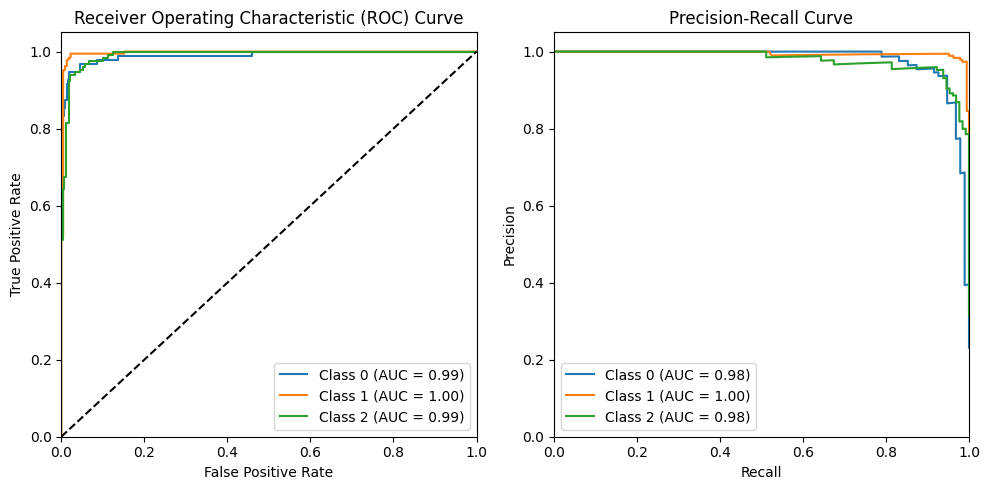

In [85]:
# Plot ROC curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot Precision-Recall curves
plt.subplot(1, 2, 2)

for i in range(3):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {pr_auc[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Save the figure as an image file (e.g., PNG)
plt.savefig('roc_and_pr_curves.png')

plt.tight_layout()
plt.show()


In [78]:
import pickle

In [79]:
import pickle

# Define the path and filename for saving the model as a .sav file
model_filename = "final_xgboost_model.sav"

# Save the trained XGBoost model to the file
with open(model_filename, 'wb') as model_file:
    pickle.dump(final_xgb_model, model_file)

print(f"XGBoost model saved as {model_filename}")

XGBoost model saved as final_xgboost_model.sav


In [80]:
import xgboost as xgb

print("XGBoost version:", xgb.__version__)

XGBoost version: 1.7.6
